# Development Cycle for Diet Recommendation System

 1. Problem Definition
 2. Data Collection
 3. Exploratory Data Analysis (EDA)
 4. Data Preprocessing
 5. Feature Engineering
 6. Model Selection
 7. Model Training
 8. Model Evaluation
 9. Integration
10. Deployment



# 1. Problem Definition

## Goal:
To provide personalized diet recommendations based on user profiles.

## Key Objectives:
- **Analyze User Profiles**: Understand user demographics and their health-related metrics like age, weight, height, activity level, etc.
- **Map Profiles with Food and Exercise Data**: Link the user's preferences and health information with appropriate food items and exercises.
- **Build a Recommendation System**: Use machine learning algorithms to recommend diet plans tailored to each user's profile, incorporating their activity level, health status, and goals.

---

# 2. Data Collection

## Datasets Used:

### 1. **User Profiles Dataset**:
Contains detailed user profiles, including:
- **age**: The user's age.
- **gender**: The user's gender (Male, Female, Non-Binary).
- **height_cm**: The user's height in centimeters.
- **weight_kg**: The user's weight in kilograms.
- **activity_level**: The user's activity level (Sedentary, Lightly Active, Moderately Active, Very Active).
- **diet_recommendation**: Recommended diet (e.g., Low Carb, High Protein, Balanced, Keto).
- **blood_pressure**: Blood pressure measurement (Systolic/Diastolic).
- **cholesterol_level**: The user's cholesterol level (Normal, Borderline, High).
- **calorie_intake**: Daily recommended calorie intake.
- **allergy_status**: Any known food allergies (None, Gluten, Dairy, Nuts, Eggs).

This dataset helps in understanding user demographics and health status, which forms the basis of personalized recommendations.

### 2. **Food Nutritional Dataset**:
Contains nutritional information for various food items, including:
- **food_id**: A unique identifier for each food item.
- **food_name**: Name of the food item.
- **calories**: Total calorie count per serving.
- **protein**: Protein content per serving.
- **carbs**: Carbohydrate content per serving.
- **fat**: Fat content per serving.
- **serving_size**: The size of a single serving (grams or milliliters).
- **food_category**: Type of food (e.g., Fruits, Vegetables, Grains, Proteins, etc.).

This dataset is essential for providing calorie and nutrient breakdowns for food recommendations.

### 3. **Exercise Dataset**:
Contains information about various exercises and their caloric burn per minute, including:
- **exercise_id**: A unique identifier for each exercise.
- **exercise_name**: Name of the exercise (e.g., Running, Cycling, Swimming).
- **calories_burnt_per_minute**: Number of calories burnt per minute for the exercise.
- **intensity_level**: Intensity of the exercise (Low, Moderate, High).
- **duration_minutes**: Recommended duration for the exercise (minutes).

This dataset helps in suggesting suitable exercises based on a user's activity level and caloric requirements.


## 2.1 Importing Data and Required Packages

### Steps:
1. Import essential Python libraries for analysis and visualization.
2. Load the datasets into Pandas DataFrames.
3. Preview the datasets to ensure successful loading.

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing datasets and converting it to pandas DataFrame

In [4]:
user_profiles = pd.read_csv(r'data/user_profiles_raw.csv')
food_data = pd.read_csv(r'data/food_nutritional_data_raw.csv')
exercise_data = pd.read_csv(r'data/exercise_data_raw.csv')

#### Show Top 5 Records

In [5]:
user_profiles.head()

,user_id,age,gender,height_cm,weight_kg,activity_level,blood_pressure,cholesterol_level,calorie_intake,allergy_status,diet_recommendation
0,1,69.0,Female,161.0,109.0,Lightly Active,180/100,High,2436,Shellfish,Free from Shellfish
1,2,25.0,Male,178.0,108.0,Moderately Active,158/102,Borderline,1872,Dairy,Free from Dairy
2,3,22.0,Female,178.0,92.0,Moderately Active,131/90,Borderline,2917,Shellfish,Free from Shellfish
3,4,20.0,Female,166.0,85.0,Very Active,180/102,High,2402,Gluten,Free from Gluten
4,5,34.0,Male,200.0,100.0,Lightly Active,144/80,Normal,2988,NaN,Plant-Based


In [6]:
food_data.head()

,food_item,calories,protein,carbs,fats,vitamins,minerals,allergy_risk
0,Food_482,199,27.3,58.2,6.0,B,Zinc,Low
1,Food_206,183,47.5,50.6,20.9,D,Magnesium,Low
2,Food_309,464,44.0,57.4,16.8,E,Calcium,Medium
3,Food_449,244,24.7,88.7,7.3,K,Zinc,Medium
4,Food_168,209,18.6,22.6,14.6,A,Iron,Medium


In [7]:
exercise_data.head()

,exercise_name,duration_min,intensity,calories_burned,suitable_for
0,Exercise_92,25,Moderate,511,Moderately Active
1,Exercise_65,16,High,193,Moderately Active
2,Exercise_108,102,High,652,Sedentary
3,Exercise_19,75,Low,685,Moderately Active
4,Exercise_80,56,High,522,Lightly Active


#### Shape of the dataset

In [8]:
print(f"Shape of User Data : {user_profiles.shape}")
print(f"Shape of food data : {food_data.shape}")
print(f"Shape of excercise data : {exercise_data.shape}")

Shape of User Data : (100000, 11)
Shape of food data : (300, 8)
Shape of excercise data : (300, 5)


### Checking Datatypes of each column

In [9]:
print(f"Datatypes of User Data : {user_profiles.dtypes}")
print(f"Datatypes of food data : {food_data.dtypes}")
print(f"Datatypes of excercise data : {exercise_data.dtypes}")

Datatypes of User Data : user_id                  int64
age                    float64
gender                  object
height_cm              float64
weight_kg              float64
activity_level          object
blood_pressure          object
cholesterol_level       object
calorie_intake           int64
allergy_status          object
diet_recommendation     object
dtype: object
Datatypes of food data : food_item        object
calories          int64
protein         float64
carbs           float64
fats            float64
vitamins         object
minerals         object
allergy_risk     object
dtype: object
Datatypes of excercise data : exercise_name      object
duration_min        int64
intensity          object
calories_burned     int64
suitable_for       object
dtype: object


## 2.2 Dataset Information

### 2.2.1 User Profiles Dataset
This dataset contains user information, which includes physical attributes, lifestyle, and dietary needs. Each row represents an individual user with the following columns:

- **user_id**: Unique identifier for each user.
- **age**: Age of the user.
- **gender**: Gender of the user.
- **height_cm**: Height of the user in centimeters.
- **weight_kg**: Weight of the user in kilograms.
- **activity_level**: The activity level of the user .
- **dit_recommendation**: The recommended diet for the user.
- **blood_pressure**: Blood pressure of the user.
- **cholesterol_level**: Cholesterol level of the user.
- **calorie_intake**: Daily calorie intake.
- **allergy_status**: Allergies the user has.

This dataset has a total of 100,000 rows, with each row representing a unique user profile. The data is generated with random values for these columns, with some missing data introduced to simulate real-world scenarios. This dataset can be used to perform exploratory data analysis, outlier detection, and to train machine learning models for personalized diet recommendations.

---

### 2.2.2 Food Nutritional Dataset
The Food Nutritional dataset contains nutritional information for a variety of food items. Each row represents a specific food item and contains the following columns:

- **food_id**: Unique identifier for each food item.
- **food_name**: Name of the food item.
- **food_category**: Category of the food item (e.g., Fruits, Vegetables, Grains, Dairy, etc.).
- **calories**: The amount of calories per serving (kcal).
- **protein**: The amount of protein per serving (g).
- **carbs**: The amount of carbohydrates per serving (g).
- **fat**: The amount of fat per serving (g).
- **fiber**: The amount of fiber per serving (g).
- **sodium**: The amount of sodium per serving (mg).
- **sugar**: The amount of sugar per serving (g).

This dataset consists of various food items that are typically part of a balanced diet. The nutritional information is helpful in providing personalized dietary recommendations based on the user's preferences and requirements. The dataset includes food categories, which can help users select foods within specific groups (e.g., fruits, vegetables, etc.).

---

### 2.2.3 Exercise Data
This dataset includes information about various exercise types and their corresponding calorie burn rates. Each row represents a specific exercise activity and contains the following columns:

- **exercise_id**: Unique identifier for each exercise.
- **exercise_name**: Name of the exercise activity (e.g., Running, Cycling, Yoga, etc.).
- **intensity_level**: Intensity level of the exercise (Low, Moderate, High).
- **duration_minutes**: Duration of the exercise (minutes).
- **calories_burnt_per_minute**: The number of calories burnt per minute of exercise.
- **muscle_group**: The primary muscle group targeted by the exercise (e.g., Legs, Core, Arms, etc.).

This dataset is useful for understanding the relationship between exercise types and their impact on calorie burning, which can be an essential part of a personalized diet and fitness recommendation system.

---

### 2.2.4 Summary of Dataset Sizes
- **User Profiles Dataset**: 100,000 rows, 11 columns.
- **Food Nutritional Dataset**: 10,000 rows, 10 columns (approximately).
- **Exercise Data**: 5,000 rows, 6 columns.

The datasets are large and contain both numerical and categorical features. These datasets provide a comprehensive foundation for building a recommendation system that personalizes diet and exercise recommendations based on user profiles.

---



## 3. Data Checks to Perform

Before diving into exploratory data analysis and preprocessing, it is crucial to perform initial data checks to understand the structure and quality of the datasets. Below are the essential checks to perform:

---

### 3.1 Data Integrity Checks
- **Missing Values**: 
  - Check for missing values in each column of the datasets.
  - Assess the percentage of missing values to decide whether to impute or drop them.

- **Duplicate Rows**:
  - Identify any duplicate rows in the datasets.
  - Remove duplicates if they do not add any additional value to the analysis.

- **Column Data Types**:
  - Verify that each column has the expected data type (e.g., numerical, categorical, string).
  - Convert data types if necessary (e.g., converting dates to `datetime` format).

---

### 3.2 Statistical Overview
- **Descriptive Statistics**:
  - Generate descriptive statistics for numerical columns (e.g., mean, median, standard deviation, minimum, maximum).
  - Identify anomalies or unusual values (e.g., extremely high/low values).

- **Categorical Value Distribution**:
  - Analyze the unique values and their counts for categorical columns.
  - Check for inconsistent or irrelevant categories (e.g., typos or out-of-scope values).

---

### 3.3 Consistency Checks
- **Range Validation**:
  - Ensure numerical columns have values within acceptable ranges (e.g., age should be between 18 and 80).
  - Validate interdependent columns (e.g., calorie intake should align with activity level).

- **Unique Identifiers**:
  - Verify that unique identifier columns (e.g., `user_id`, `food_id`, `exercise_id`) do not have duplicates.

---

### 3.4 Outlier Detection
- **Box Plot Analysis**:
  - Use box plots to visually detect outliers in numerical columns (e.g., weight, calorie intake, duration of exercise).

- **Z-Score Analysis**:
  - Calculate Z-scores for numerical columns to identify values beyond a specific threshold (e.g., ±3 standard deviations).

- **Interquartile Range (IQR)**:
  - Compute the IQR to detect and handle extreme outliers in the datasets.

---

### 3.5 Data Balance
- **Class Imbalance**:
  - Check the balance of classes in categorical columns (e.g., gender, activity level, food categories).
  - Address imbalances using techniques like oversampling, undersampling, or class weighting (if required for modeling).

- **Sample Size**:
  - Ensure that the datasets have a sufficient number of records for each category or feature value to build robust models.

---

### 3.6 Data Relationships
- **Correlation Analysis**:
  - Compute correlations between numerical columns to identify linear relationships.
  - Use heatmaps to visualize the strength and direction of correlations.

- **Cross-Tabulations**:
  - Explore relationships between categorical columns using cross-tabulations or group-by operations.

---

### 3.7 Data Distribution
- **Skewness and Kurtosis**:
  - Assess the distribution of numerical features to identify skewness and non-normal distributions.
  - Apply transformations (e.g., log, square root) if needed for highly skewed data.

- **Visualization**:
  - Use histograms, KDE plots, or bar charts to visualize the distribution of each column.

---

### 3.8 Dataset Summary
After performing the above checks:
- Summarize findings about data quality and integrity.
- Create a plan for handling identified issues (e.g., missing values, outliers, inconsistent data types).
- Highlight any key observations or insights from the initial data checks.

---


### 1. Checking Missing  Values

In [10]:
# check for missing values in user_profiles
user_profiles.isna().sum()

user_id                    0
age                      100
gender                     0
height_cm                100
weight_kg                100
activity_level             0
blood_pressure             0
cholesterol_level          0
calorie_intake             0
allergy_status         14273
diet_recommendation        0
dtype: int64

In [11]:
# checking for missing values in food data
food_data.isna().sum()

food_item        0
calories         0
protein          0
carbs            0
fats             0
vitamins        48
minerals        62
allergy_risk     0
dtype: int64

In [12]:
# checking missing values in exercise_data
exercise_data.isna().sum()

exercise_name      0
duration_min       0
intensity          0
calories_burned    0
suitable_for       0
dtype: int64

### Handling Missing Values Accordingly

In [13]:
"""
the data type of each column are:
Datatypes of User Data : 
user_id                 object
age                      int64
gender                  object
height_cm              float64
weight_kg              float64
activity_level          object
diet_recommendation     object
blood_pressure          object
cholesterol_level       object
calorie_intake         float64
allergy_status          object
dtype: object



"""
# missing values in height column is filled with median of the column
user_profiles['height_cm'] = user_profiles['height_cm'].fillna(user_profiles['height_cm'].median())




In [14]:
# diet_recomendation is the output feature, so we are dropping the rows with null value for accurecy

user_profiles = user_profiles.dropna(subset=['diet_recommendation'])


In [15]:
# missing values in the blood pressure column will be filled with Mode.
user_profiles['blood_pressure'] = user_profiles["blood_pressure"].fillna(user_profiles["blood_pressure"].mode()[0])


In [16]:
# the allergy_statuscolumn have None value columns which indicates no allergies, so covert the none values to No Allergies

# Replace None (or NaN) values in 'allergy_status' column with 'No Allergies'
user_profiles['allergy_status'] = user_profiles['allergy_status'].fillna('No Allergies')


In [17]:
# check if the missing values are filled.
user_profiles.isna().sum()

user_id                  0
age                    100
gender                   0
height_cm                0
weight_kg              100
activity_level           0
blood_pressure           0
cholesterol_level        0
calorie_intake           0
allergy_status           0
diet_recommendation      0
dtype: int64

### Checking for any duplicate values

In [18]:
user_profiles.duplicated().sum()

np.int64(0)

### Checking for the unique values in each column

In [19]:
user_profiles.nunique()

user_id                100000
age                        63
gender                      2
height_cm                 101
weight_kg                 121
activity_level              4
blood_pressure           1741
cholesterol_level           3
calorie_intake           2301
allergy_status              7
diet_recommendation        19
dtype: int64

### Data Exploration

checking the values in each columns.

In [20]:
print("unique values in the column age : ")
print(user_profiles["age"].unique())

print("unique values in gender : ")
print(user_profiles["gender"].unique())

# print("unique values in the columns height_cm : ")
# print(user_profiles["height_cm"].unique())

# print("unique values in the column weight_kg : ")
# print(user_profiles["weight_kg"].unique())

print("unique values in the column activity level : ")
print(user_profiles["activity_level"].unique())

print("unique values in the column diet_recommendation : ")
print(user_profiles["diet_recommendation"].unique())

print("unique values in the column cholesterol_level : ")
print(user_profiles["cholesterol_level"].unique())

print("unique values in the column allergy_status : ")
print(user_profiles["allergy_status"].unique())

unique values in the column age : 
[69. 25. 22. 20. 34. 51. 58. 36. 65. 76. 32. 63. 80. 55. 79. 31. 24. nan
 33. 28. 62. 56. 52. 35. 60. 75. 19. 66. 40. 38. 43. 61. 21. 71. 70. 44.
 42. 37. 54. 72. 26. 48. 23. 45. 49. 74. 39. 27. 18. 47. 77. 64. 46. 59.
 57. 50. 68. 67. 30. 73. 53. 78. 29. 41.]
unique values in gender : 
['Female' 'Male']
unique values in the column activity level : 
['Lightly Active' 'Moderately Active' 'Very Active' 'Sedentary']
unique values in the column diet_recommendation : 
['Free from Shellfish' 'Free from Dairy' 'Free from Gluten' 'Plant-Based'
 'Free from Nuts' 'Heart-Friendly' 'Mediterranean' 'Free from Eggs'
 'Free from Soy' 'Paleo' 'Keto' 'Low Cholesterol' 'Low Sodium'
 'High Fiber' 'Balanced' 'DASH' 'High Protein' 'Low Carb' 'Calorie-Dense']
unique values in the column cholesterol_level : 
['High' 'Borderline' 'Normal']
unique values in the column allergy_status : 
['Shellfish' 'Dairy' 'Gluten' 'No Allergies' 'Nuts' 'Eggs' 'Soy']


### Defining numerical features and categorical features.


In [21]:
# assigning numeric and categorical features

numeric_features = [feature for feature in user_profiles.columns if user_profiles[feature].dtype != "O"]
categorical_features = [feature for feature in user_profiles.columns if user_profiles[feature].dtype == "O"]


# printing the feature columns

print(f"The numeric features are : {numeric_features}, \n The categorical features are : {categorical_features}")



The numeric features are : ['user_id', 'age', 'height_cm', 'weight_kg', 'calorie_intake'], 
 The categorical features are : ['gender', 'activity_level', 'blood_pressure', 'cholesterol_level', 'allergy_status', 'diet_recommendation']


### Dropping unnecessary features


In [22]:
# the column user id is not important for the prediction so we are dropping it.

user_profiles = user_profiles.drop("user_id", axis=1)
user_profiles.head()

,age,gender,height_cm,weight_kg,activity_level,blood_pressure,cholesterol_level,calorie_intake,allergy_status,diet_recommendation
0,69.0,Female,161.0,109.0,Lightly Active,180/100,High,2436,Shellfish,Free from Shellfish
1,25.0,Male,178.0,108.0,Moderately Active,158/102,Borderline,1872,Dairy,Free from Dairy
2,22.0,Female,178.0,92.0,Moderately Active,131/90,Borderline,2917,Shellfish,Free from Shellfish
3,20.0,Female,166.0,85.0,Very Active,180/102,High,2402,Gluten,Free from Gluten
4,34.0,Male,200.0,100.0,Lightly Active,144/80,Normal,2988,No Allergies,Plant-Based


### Converting Weight and Height to BMI and Dropping Original Features

To simplify the feature set and reduce redundancy, we calculate the Body Mass Index (BMI) from the `height_cm` and `weight_kg` columns using the formula:

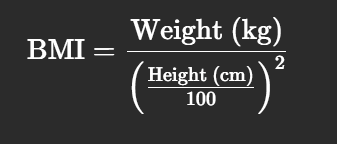

Once the BMI is calculated:

- The `height_cm` and `weight_kg` columns are no longer required for the analysis and will be dropped.
- This helps in reducing feature dimensionality and ensures the dataset remains concise while retaining meaningful information.


In [23]:
# Calculate BMI
user_profiles['BMI'] = (user_profiles['weight_kg'] / ((user_profiles['height_cm'] / 100) ** 2)).round(1)

# Drop height_cm and weight_kg columns
user_profiles = user_profiles.drop(['height_cm', 'weight_kg'], axis=1)

# Checking the first few rows to confirm changes
user_profiles.head()

,age,gender,activity_level,blood_pressure,cholesterol_level,calorie_intake,allergy_status,diet_recommendation,BMI
0,69.0,Female,Lightly Active,180/100,High,2436,Shellfish,Free from Shellfish,42.1
1,25.0,Male,Moderately Active,158/102,Borderline,1872,Dairy,Free from Dairy,34.1
2,22.0,Female,Moderately Active,131/90,Borderline,2917,Shellfish,Free from Shellfish,29.0
3,20.0,Female,Very Active,180/102,High,2402,Gluten,Free from Gluten,30.8
4,34.0,Male,Lightly Active,144/80,Normal,2988,No Allergies,Plant-Based,25.0


### Exploring Data (Visuallisation):


#### 1. Age distribution

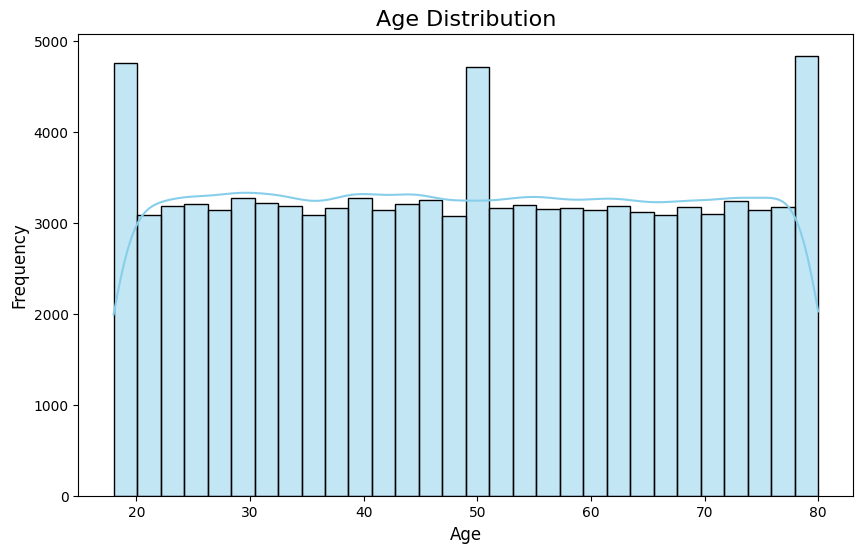

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_profiles['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


##### **Insights:**

-  almost all age groups covers evenly except for age group below 20, age group 50 and age group 88-89 are higher than normal.


#### 2. Gender Count

C:\Users\jayas\AppData\Local\Temp\ipykernel_15572\1746074795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=user_profiles, palette='pastel')


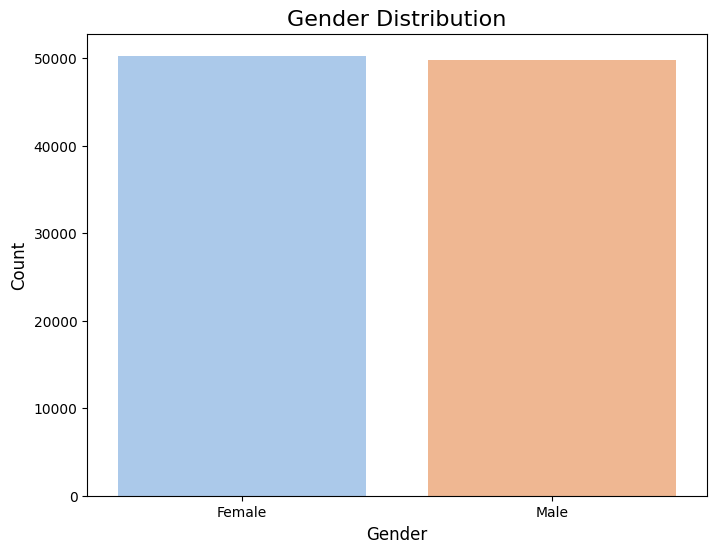

In [25]:
# Gender count
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=user_profiles, palette='pastel')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


**Insights:**

- the genders male and females are almost distributed evenly.
- the Non-Binary People shares a small amount.

#### 3. Activity Level Distribution

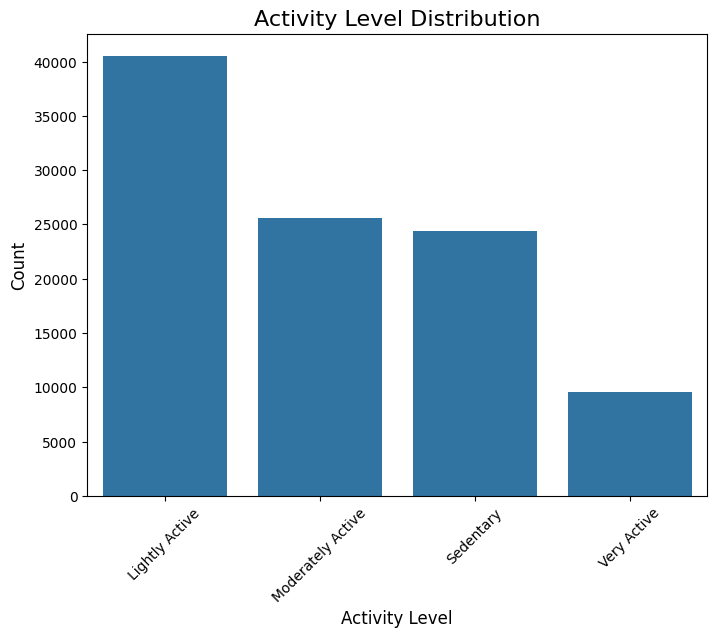

In [26]:
# Activity level count
plt.figure(figsize=(8, 6))
sns.countplot(x='activity_level', data=user_profiles, order=user_profiles['activity_level'].value_counts().index)
plt.title('Activity Level Distribution', fontsize=16)
plt.xlabel('Activity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Insights:**

- Sedentary is the most common activity level.
- Very Active is the least common activity level.

#### 4. BMI Distribution


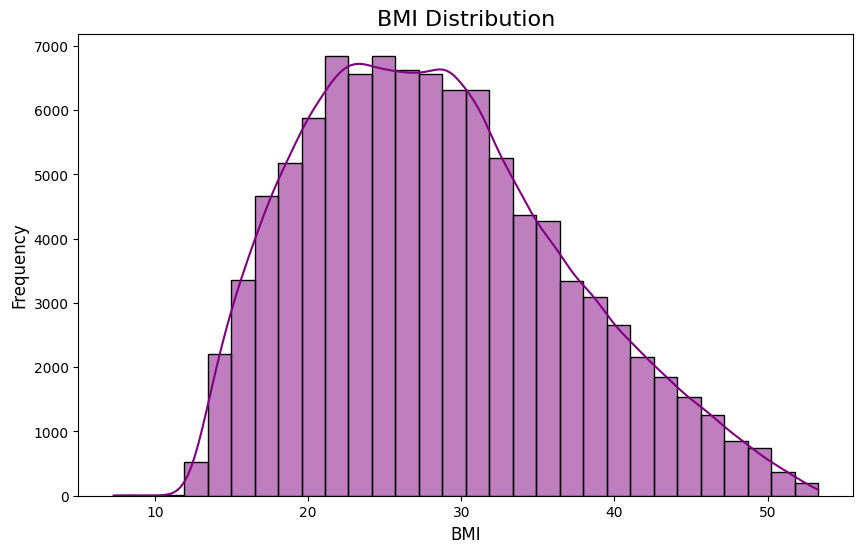

In [27]:
# BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_profiles['BMI'], kde=True, color='purple', bins=30)
plt.title('BMI Distribution', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Insights:**

- Most propotion of user are in the 20 to 30 BMI Ranges.
- Focus recommendations on users in unhealthy BMI categories.

#### 5. Calorie Intake by Activity Level


C:\Users\jayas\AppData\Local\Temp\ipykernel_15572\787644121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activity_level', y='calorie_intake', data=user_profiles, palette='coolwarm')


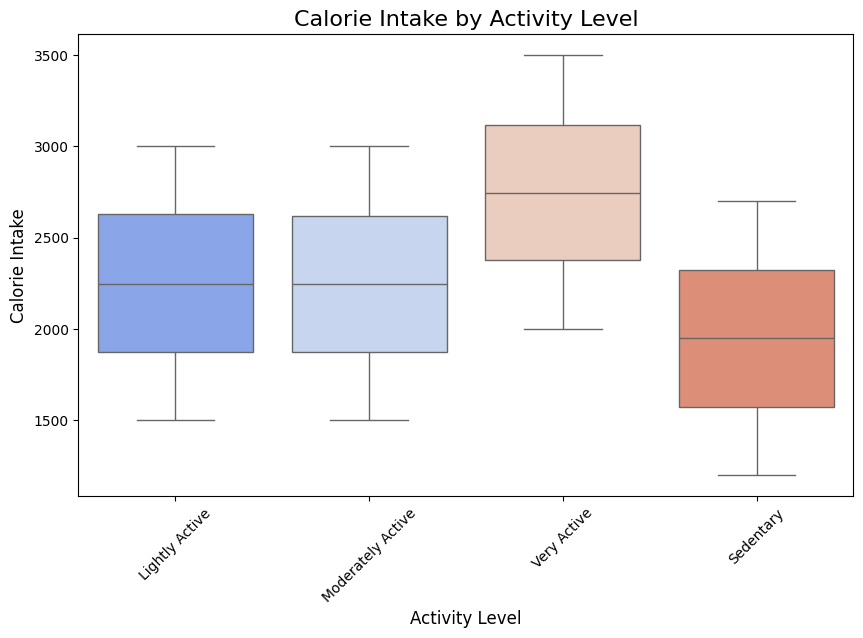

In [28]:
# Boxplot of calorie intake by activity level
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity_level', y='calorie_intake', data=user_profiles, palette='coolwarm')
plt.title('Calorie Intake by Activity Level', fontsize=16)
plt.xlabel('Activity Level', fontsize=12)
plt.ylabel('Calorie Intake', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Insights:

- Very active people tends to take more calories.
- there are some outliers are in the colorie intake, will have to reaplace it with the mean value later.

#### 6. Cholesterol Levels by Age Group

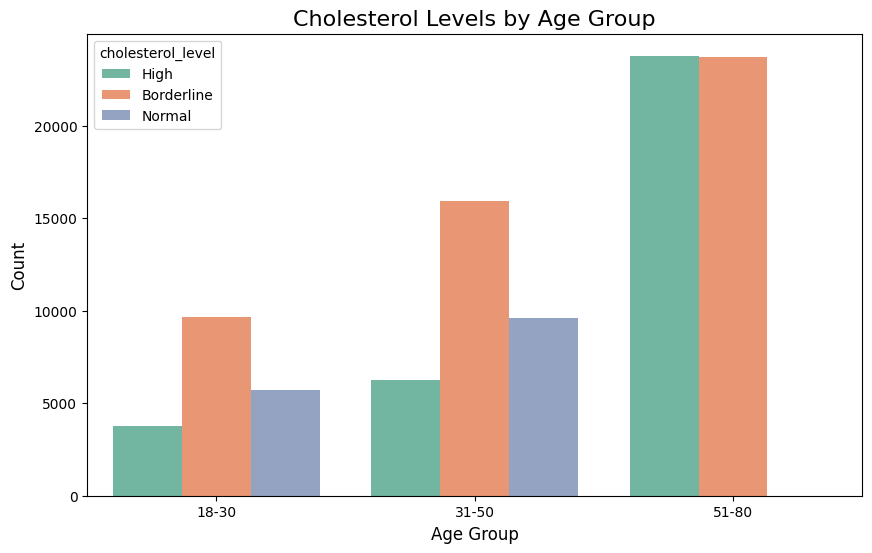

In [29]:
# Create age groups
user_profiles['age_group'] = pd.cut(user_profiles['age'], bins=[18, 30, 50, 80], labels=['18-30', '31-50', '51-80'])

# Countplot of cholesterol levels by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='cholesterol_level', data=user_profiles, palette='Set2')
plt.title('Cholesterol Levels by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


**Insights:**

- Check which age groups have higher cholesterol levels.
- Tailor recommendations for managing cholesterol levels in specific age groups.

#### 7. Diet Recommendations


C:\Users\jayas\AppData\Local\Temp\ipykernel_15572\1268924617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diet_recommendation', data=user_profiles, palette='spring', order=user_profiles['diet_recommendation'].value_counts().index)


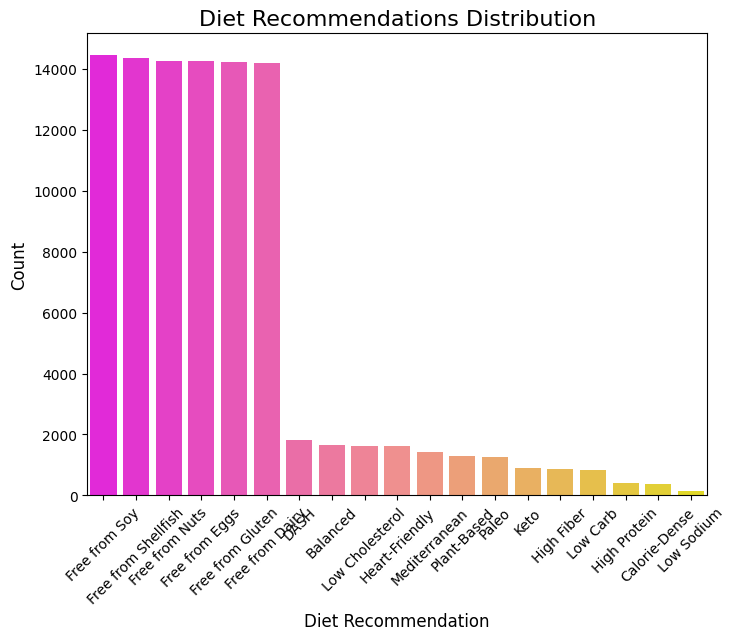

In [30]:
# Diet recommendation count
plt.figure(figsize=(8, 6))
sns.countplot(x='diet_recommendation', data=user_profiles, palette='spring', order=user_profiles['diet_recommendation'].value_counts().index)
plt.title('Diet Recommendations Distribution', fontsize=16)
plt.xlabel('Diet Recommendation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

